<a href="https://colab.research.google.com/github/vidhya2324/Machine_learning_starting_project/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Diabetes prediction

In [1]:
#import the neccessary libraries:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn import svm

In [2]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors
  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 47.7MB/s]


In [3]:
!unzip \*.zip && rm *.zip

Archive:  diabetes-prediction-dataset.zip
  inflating: diabetes_prediction_dataset.csv  


In [4]:
diabetes_dataset=pd.read_csv("/content/diabetes_prediction_dataset.csv")

In [5]:
diabetes_dataset.shape



(100000, 9)

In [6]:
diabetes_dataset.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
diabetes_dataset.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
diabetes_dataset.tail()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [ ]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
# Assuming you want the value counts of the column at index 8
diabetes_dataset.iloc[:, 8].value_counts()

,count
diabetes,
0,91500
1,8500


In [ ]:
# Assuming you want the value counts of the column at index 8
diabetes_dataset.iloc[:, 0].value_counts()

,count
gender,
Female,58552
Male,41430
Other,18


In [ ]:
# Assuming you want the value counts of the column at index 8
diabetes_dataset.iloc[:, 4].value_counts()

,count
smoking_history,
No Info,35816
never,35095
former,9352
current,9286
not current,6447
ever,4004


#data preprocessing

Here I use the replace function...but we can use the one hot encoding which include the pd.get dummies method also...

In [8]:
#change the categorical values into numerical values by using replace function in gender colunm
diabetes_dataset["gender"]=diabetes_dataset["gender"].replace({"Female":1,"Male":0, "Other":2})
diabetes_dataset["smoking_history"]=diabetes_dataset["smoking_history"].replace({"never":0,"No Info":1,"current":2,"former":3,"ever":4,"not current":5})

In [9]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB


In [10]:
diabetes_dataset.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


Visualization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='gender', ylabel='count'>

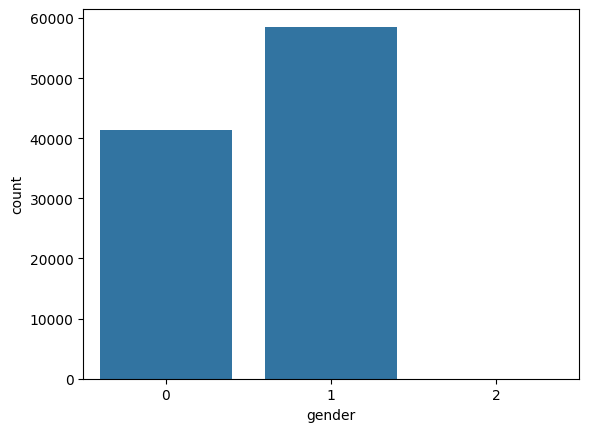

In [ ]:
#Bar plot
sns.countplot(x="gender",data=diabetes_dataset)


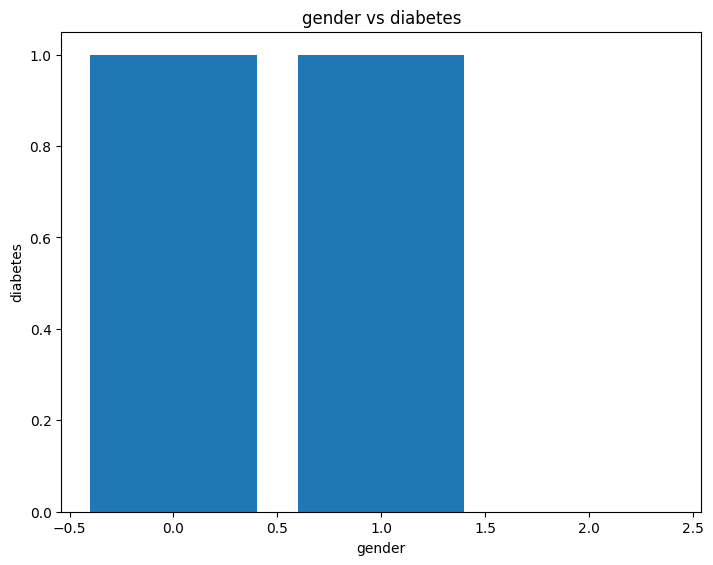

In [ ]:
#bar plot
Fig=plt.figure()
ax=Fig.add_axes([0,0,1,1])
gender=diabetes_dataset["gender"]
diabetes=diabetes_dataset["diabetes"]
ax.bar(gender,diabetes)
plt.xlabel("gender")
plt.ylabel("diabetes")
plt.title("gender vs diabetes")
plt.show()

In [ ]:
Fig1=plt.figure()
ax1=Fig1.add_axes([0,0,1,1])
age=diabetes_dataset["age"]
diabetes=diabetes_dataset["diabetes"]
ax1.pie(diabetes, labels=age, autopct="%1.1f%%")
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-11-4a492372809a>, line 5)

#Training and Testing the data

In [12]:
x=diabetes_dataset.drop(columns="diabetes",axis=1)
y=diabetes_dataset["diabetes"]

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)


In [14]:
print(x.shape,x_train.shape,x_test.shape)

(100000, 8) (80000, 8) (20000, 8)


In [15]:
print(y.shape)

(100000,)


#Model training

In [16]:
classifier = svm.SVC(kernel='linear')

In [ ]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB


In [17]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

#model evalution

In [18]:
x_training_prediction=classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_training_prediction,y_train)

In [19]:
y_testing_prediction=classifier.predict(x_test)
testing_data_accuracy=accuracy_score(y_testing_prediction,y_test)

#Making a Predictive System

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

NameError: name 'scaler' is not defined